In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
#from wordcloud import WordCloud
%matplotlib inline

In [7]:
df=pd.read_excel('/content/drive/MyDrive/hotel_reviews (1).xlsx')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [9]:
df.shape

(20491, 2)

In [10]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [11]:
# look  describe data set
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

In [12]:
# checking any duplicate data 
df.duplicated().sum()

0

In [15]:
df["Rating"].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


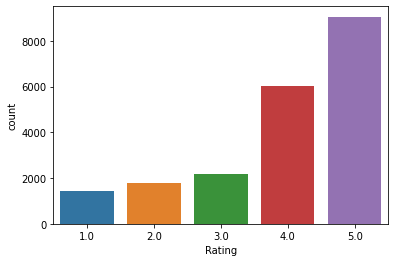

In [17]:
import seaborn as sns
sns.countplot(df["Rating"])
plt.show()

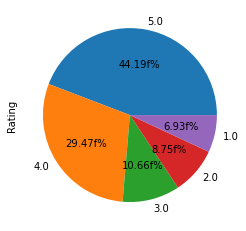

In [18]:
df.Rating.value_counts().plot(kind="pie",autopct='%1.2ff%%')

In [19]:
df = [Review.strip() for Review in df.Review] # remove both the leading and the trailing spaces
df = [Review for Review in df if Review] # removes empty strings, because they are considered in Python as False
df[0:10]  

['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,',
 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unli

In [20]:
# Joining the list into one string/text
text = ' '.join(df)
text

Output hidden; open in https://colab.research.google.com to view.

In [21]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

Output hidden; open in https://colab.research.google.com to view.

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors']


In [24]:
len(text_tokens)

2138794

In [25]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
#Normalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed']


In [27]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'soundproof', 'like']


In [29]:
len(no_stop_tokens)

2063047

In [30]:
len(lower_words)

2138794

In [31]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['nice', 'hotel', 'expens', 'park', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'nonexist', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like']


In [33]:
for w in no_stop_tokens:
    print(w, " : ", ps.stem(w))

Streaming output truncated to the last 5000 lines.
floor  :  floor
sparkling  :  sparkl
clean  :  clean
new  :  new
bed  :  bed
comfy  :  comfi
location  :  locat
great  :  great
short  :  short
walk  :  walk
union  :  union
square  :  squar
gave  :  gave
2pm  :  2pm
check  :  check
day  :  day
breakfast  :  breakfast
quiet  :  quiet
restaurant  :  restaur
good  :  good
spectacular  :  spectacular
tiny  :  tini
lap  :  lap
pool  :  pool
filled  :  fill
overabudance  :  overabud
children  :  children
use  :  use
pool  :  pool
room  :  room
nice  :  nice
plush  :  plush
robes  :  robe
valet  :  valet
people  :  peopl
friendly  :  friendli
helpful  :  help
lot  :  lot
rooms  :  room
sf  :  sf
funky  :  funki
small  :  small
nice  :  nice
modern  :  modern
bigger  :  bigger
rooms  :  room
husband  :  husband
great  :  great
room  :  room
hang  :  hang
enjoy  :  enjoy
company  :  compani
daughter  :  daughter
really  :  realli
sight  :  sight
seeing  :  see
tourists  :  tourist
wanting  :  

In [38]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [43]:
for w in stemmed_tokens:
    print(w, " : ", lemmatizer.lemmatize(w))

Streaming output truncated to the last 5000 lines.
floor  :  floor
sparkl  :  sparkl
clean  :  clean
new  :  new
bed  :  bed
comfi  :  comfi
locat  :  locat
great  :  great
short  :  short
walk  :  walk
union  :  union
squar  :  squar
gave  :  gave
2pm  :  2pm
check  :  check
day  :  day
breakfast  :  breakfast
quiet  :  quiet
restaur  :  restaur
good  :  good
spectacular  :  spectacular
tini  :  tini
lap  :  lap
pool  :  pool
fill  :  fill
overabud  :  overabud
children  :  child
use  :  use
pool  :  pool
room  :  room
nice  :  nice
plush  :  plush
robe  :  robe
valet  :  valet
peopl  :  peopl
friendli  :  friendli
help  :  help
lot  :  lot
room  :  room
sf  :  sf
funki  :  funki
small  :  small
nice  :  nice
modern  :  modern
bigger  :  bigger
room  :  room
husband  :  husband
great  :  great
room  :  room
hang  :  hang
enjoy  :  enjoy
compani  :  compani
daughter  :  daughter
realli  :  realli
sight  :  sight
see  :  see
tourist  :  tourist
want  :  want
relax  :  relax
away  :  awa

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),
                                         max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [46]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', 'airport', 'area', 'away', 'bad', 'bar', 'bathroom', 'beach', 'beautiful', 'bed', 'best', 'better', 'big', 'bit', 'booked', 'breakfast', 'buffet', 'check', 'city', 'clean', 'close', 'comfortable', 'day', 'days', 'definitely', 'desk', 'did', 'did not', 'excellent', 'experience', 'fantastic', 'floor', 'food', 'free', 'friendly', 'going', 'good', 'got', 'great', 'helpful', 'hotel', 'hotels', 'just', 'large', 'like', 'little', 'lobby', 'location', 'lot', 'loved', 'lovely', 'make', 'minutes', 'morning', 'need', 'new', 'nice', 'night', 'nights', 'no', 'not', 'people', 'perfect', 'place', 'pool', 'price', 'problem', 'quiet', 'quite', 'really', 'recommend', 'resort', 'restaurant', 'restaurants', 'reviews', 'right', 'room', 'rooms', 'say', 'service', 'shower', 'small', 'staff', 'stay', 'stayed', 'street', 'the', 'think', 'time', 'took', 'trip', 'view', 'walk', 'walking', 'want', 'water', 'way', 'week', 'went', 'wonderful']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 500)

In [49]:
tf_idf_matrix =vectorizer_n_gram_max_features.fit_transform(df)

In [50]:
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix.toarray())

['00', '10', '11', '12', '15', '20', '30', '50', 'able', 'absolutely', 'access', 'activities', 'actually', 'afternoon', 'air', 'airport', 'all', 'amazing', 'american', 'amsterdam', 'area', 'areas', 'arrival', 'arrived', 'ask', 'asked', 'ate', 'available', 'average', 'away', 'awesome', 'bad', 'bags', 'balcony', 'bar', 'barcelona', 'bars', 'bath', 'bathroom', 'bathrooms', 'beach', 'beautiful', 'bed', 'bedroom', 'beds', 'believe', 'best', 'better', 'big', 'bit', 'block', 'blocks', 'book', 'booked', 'booking', 'breakfast', 'bring', 'brought', 'buffet', 'building', 'bus', 'business', 'busy', 'ca', 'cafe', 'called', 'came', 'cana', 'car', 'card', 'care', 'casino', 'center', 'central', 'centre', 'certainly', 'chairs', 'change', 'charge', 'cheap', 'check', 'check in', 'checked', 'children', 'choice', 'choose', 'chose', 'city', 'clean', 'cleaned', 'close', 'club', 'coffee', 'cold', 'come', 'comfortable', 'complimentary', 'concierge', 'convenient', 'cool', 'corner', 'cost', 'couple', 'course', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [53]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

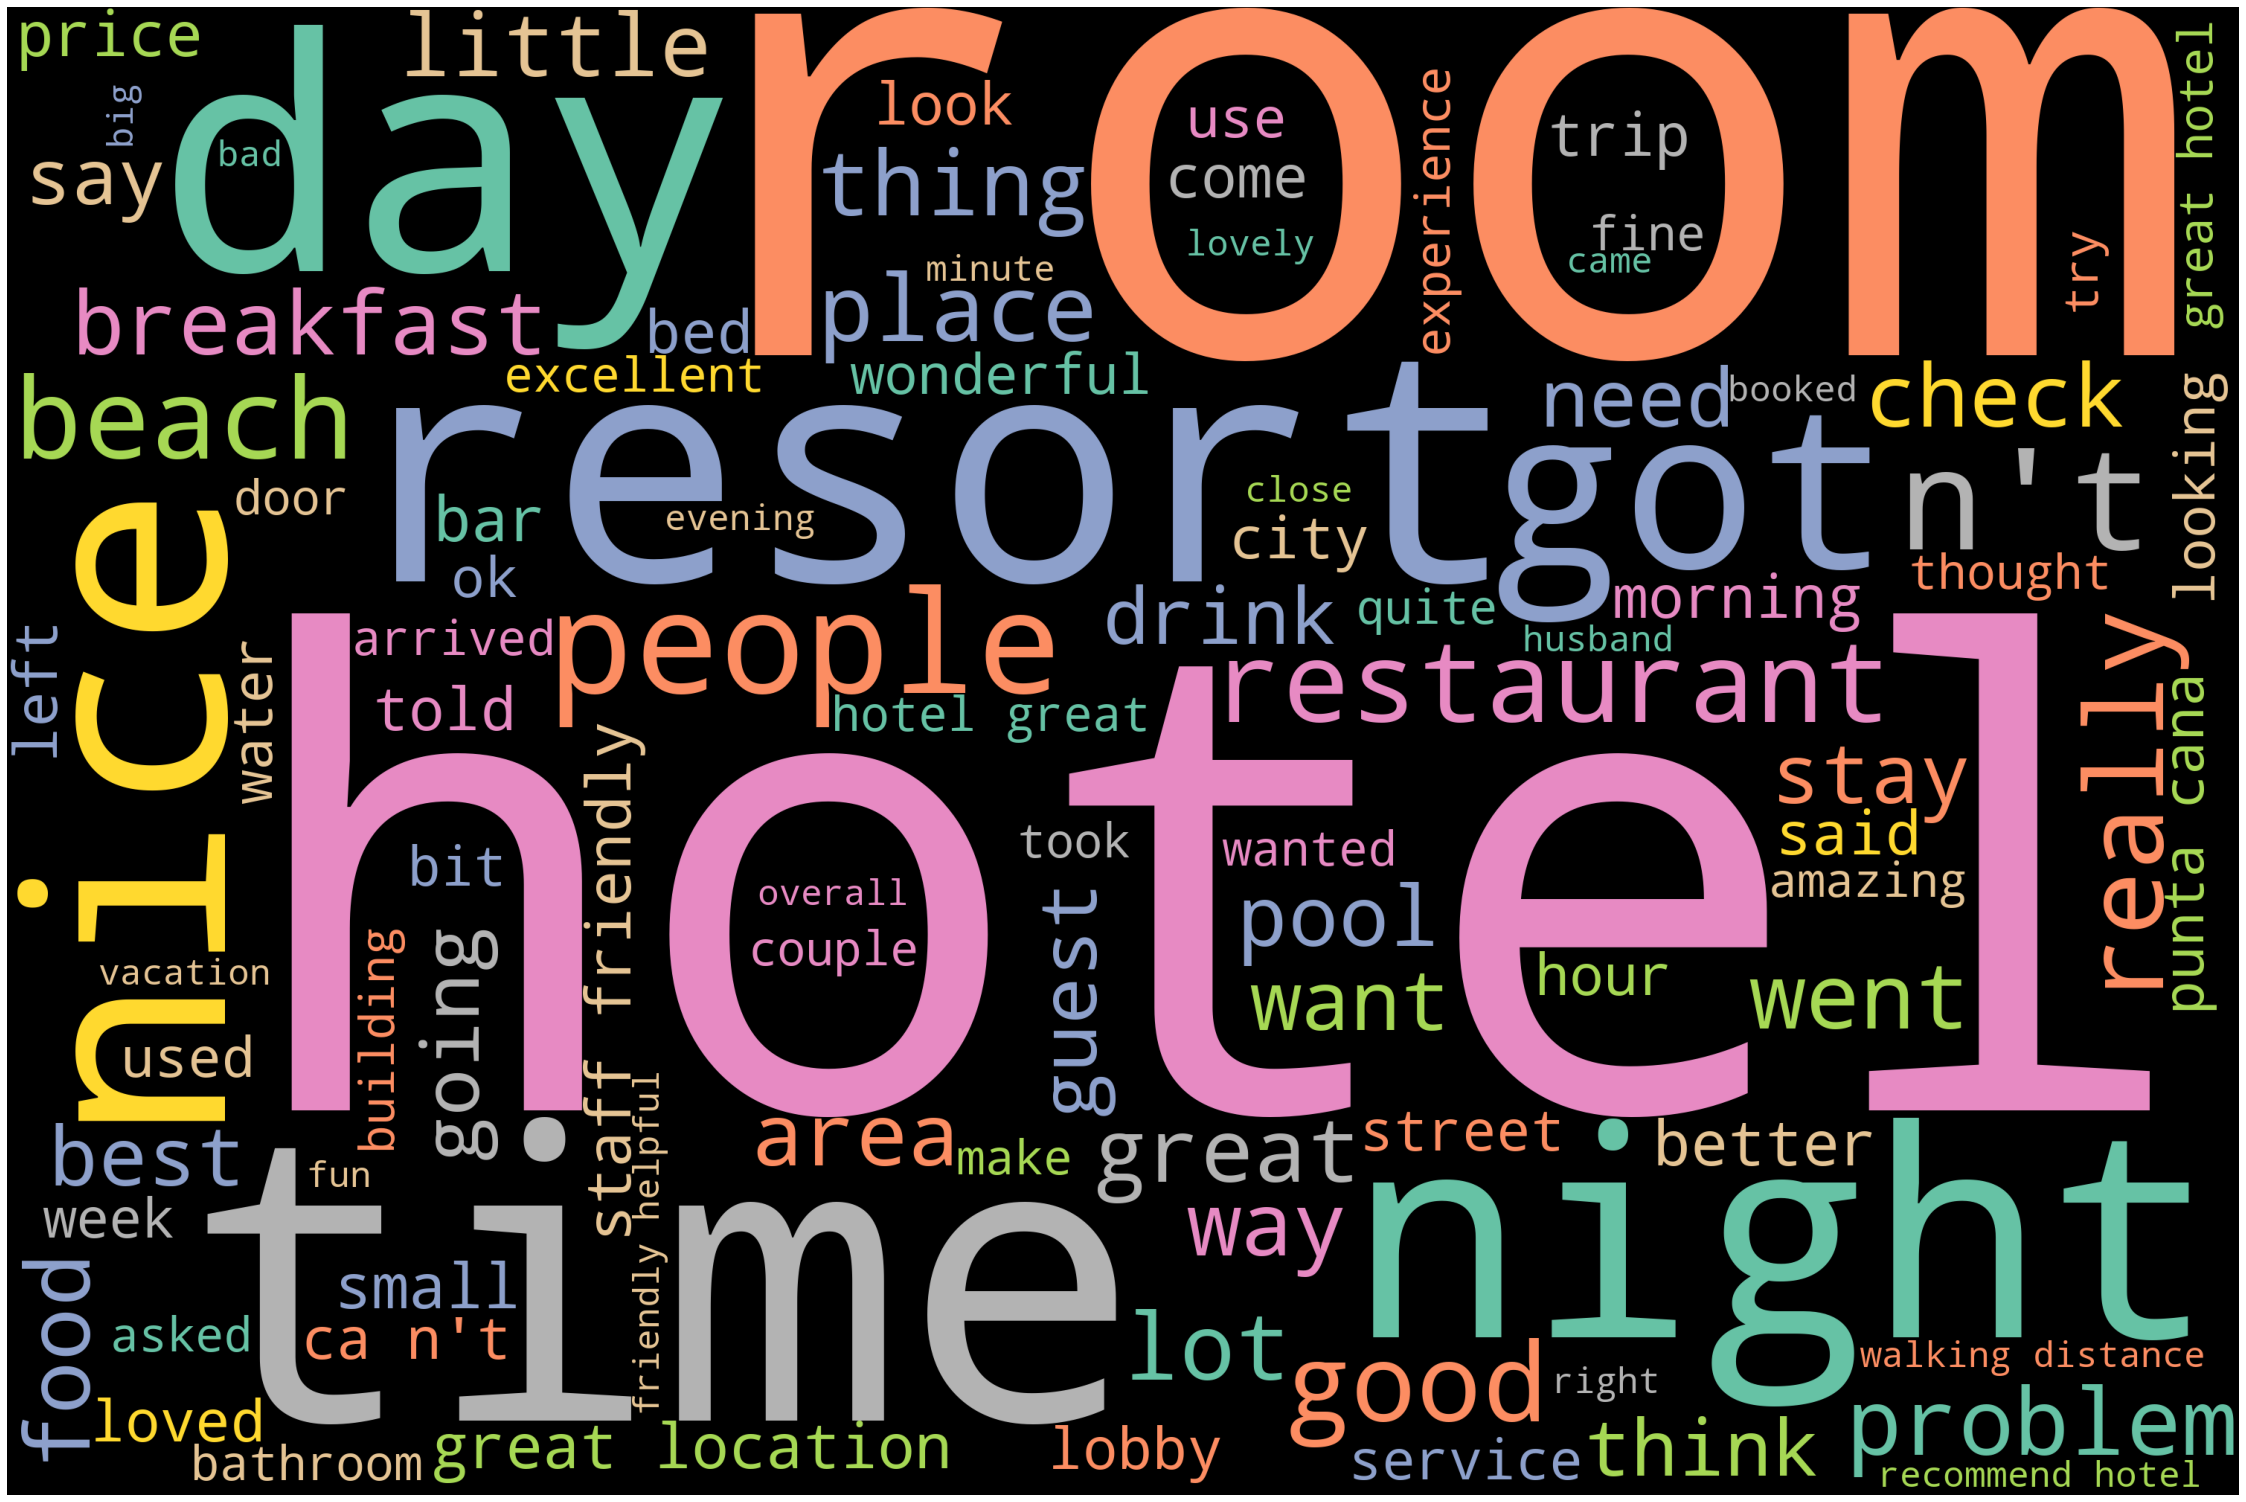

In [54]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')



wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)